In [11]:
import cv2
import matplotlib
import tensorflow as tf
import tensorflow.keras.layers as tfl
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, ZeroPadding2D, Conv2D, MaxPooling2D, ReLU, Dropout
from keras.models import load_model

In [12]:
path_to_train_data = "./dataset/train/train/"
train_dirs = []
for entry in os.scandir(path_to_train_data):
    if entry.is_dir():
        train_dirs.append(entry.path)

In [13]:
X = []
y = []
d = range(20)
for train_dir in train_dirs:
    train = train_dir.split('/')[-1]
    for training_image in os.scandir(train_dir):
        img1 = cv2.imread(training_image.path)
        X.append(img1)
        y.append(d[int(train)])

y = np.array(y)       

In [14]:
X = np.array(X).astype(float)
print(X.shape)

(18000, 50, 50, 3)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)


In [17]:
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size = (7,7),strides = (1,1),input_shape = (50,50,3)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None, padding='valid'))
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Conv2D(filters = 16,kernel_size = (3,3),strides = (1,1)))
model.add(MaxPooling2D(pool_size=(2, 2),strides=None, padding='valid'))
model.add(ReLU())
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(20,activation='softmax'))
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=1e-6),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

C:\Users\z.kate\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
logs = model.fit(X_train,y_train, epochs=100, validation_data = (X_test,y_test))

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.0687 - loss: 84.0173 - val_accuracy: 0.1113 - val_loss: 31.8410
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0683 - loss: 45.4338 - val_accuracy: 0.0980 - val_loss: 20.7405
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0721 - loss: 32.3896 - val_accuracy: 0.1009 - val_loss: 15.9921
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0936 - loss: 24.6806 - val_accuracy: 0.1169 - val_loss: 13.3291
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.0996 - loss: 20.8034 - val_accuracy: 0.1367 - val_loss: 11.4560
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1226 - loss: 17.9422 - val_accuracy: 0.1511 - val_loss: 10.0513
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1414 - loss: 15.3418 - val_accuracy: 0.1687 - val_loss: 8.8485
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.1450 - l

C:\Users\z.kate\AppData\Local\Temp\ipykernel_14192\844942236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\z.kate\AppData\Local\Temp\ipykernel_14192\844942236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

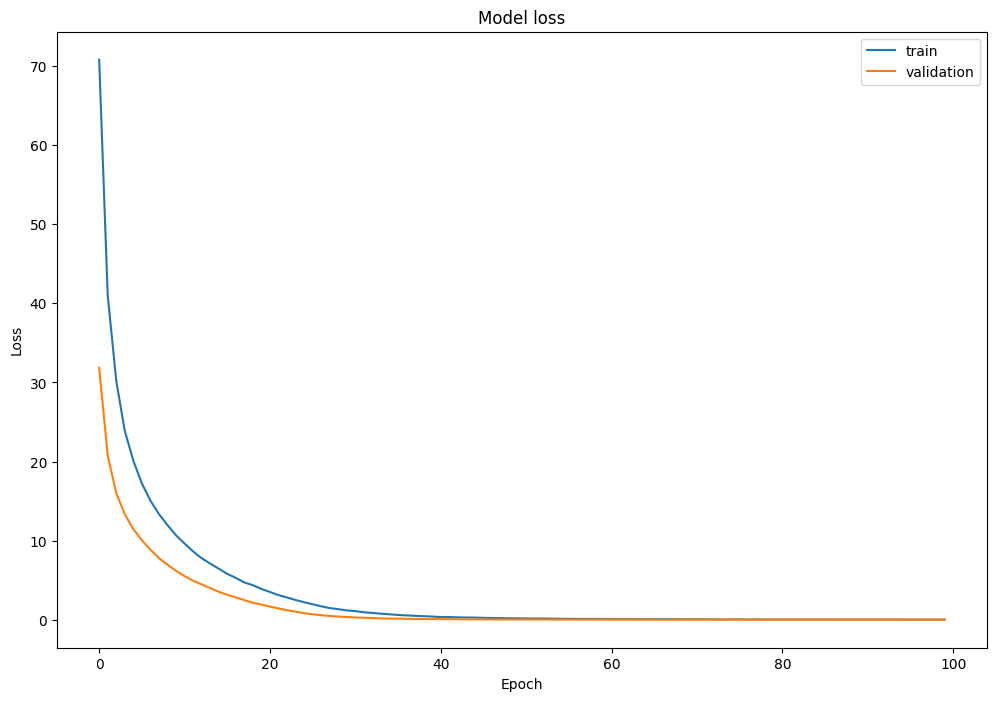

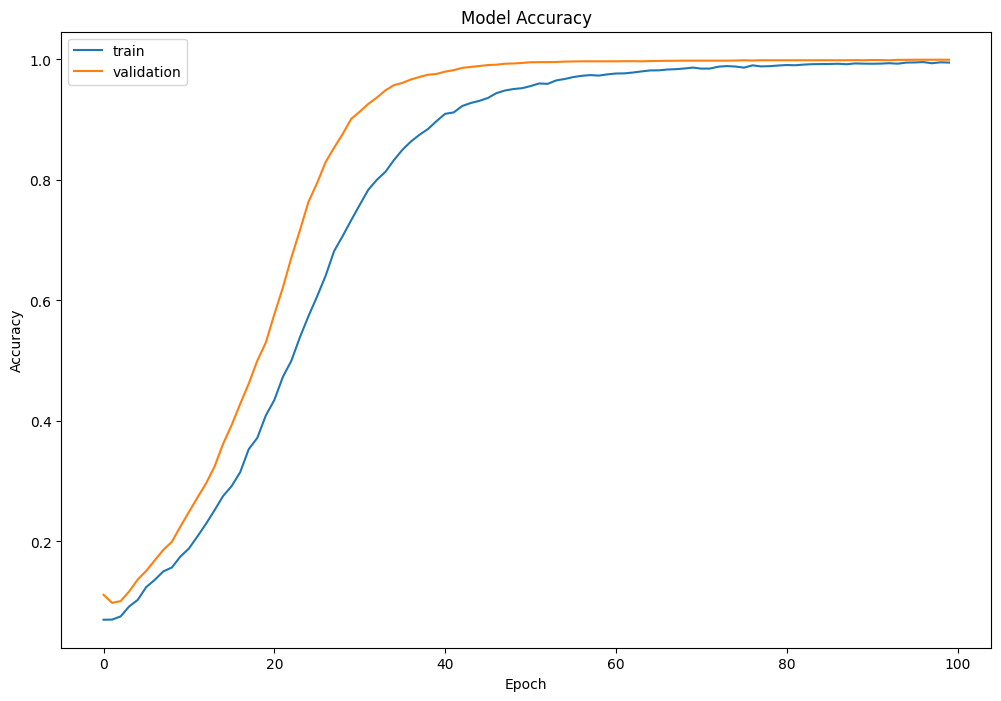

In [16]:
df_loss_acc = pd.DataFrame(logs.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

In [21]:
model.save("model_best.h5")

In [16]:
path_to_test_data = "./dataset/test/test/"
test_dirs = []
for entry in os.scandir(path_to_test_data):
    if entry.is_dir():
        test_dirs.append(entry.path)

X_test1 = []
test_target = []
d1 = range(20)
for test_dir in test_dirs:
    test = test_dir.split('/')[-1]
    for test_image in os.scandir(test_dir):
        img2 = cv2.imread(test_image.path)
        X_test1.append(img2)
        test_target.append(d1[int(test)])
        

        
X_test1 = np.array(X_test1).astype(float)

In [ ]:
model = load_model('model.h5')

In [ ]:
y_pred = model.predict(X_test)
for x in range(len(X_test)):
    print('Actual value-->',test_target[x],'   Predicted value-->',np.argmax(y_pred[x]))
